In [45]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from numpy import *
import scipy.io as sio
from ex3 import visualize_subset_100, predict
from ex2 import costFunctionReg, costFunctionGradientReg

In [43]:
mat = sio.loadmat('ex4data1.mat')
weights = sio.loadmat('ex4weights.mat')
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [40]:
Theta1, Theta2 = [weights['Theta1'], weights['Theta2']]
nn_params = np.r_[Theta1.flatten(), Theta2.flatten()]

# check if it worked:
print (Theta1.shape, Theta2.shape, nn_params.shape)
Theta1_ = nn_params[:25*401].reshape(Theta1.shape)
Theta2_ = nn_params[25*401:].reshape(Theta2.shape)
all(Theta1 == Theta1_) and all(Theta2==Theta2_)

(25, 401) (10, 26) (10285,)


True

In [41]:
y = mat['y'].T
X = mat['X'].T
m = X.shape[1]
# get rid of confusing 10 instead of 0...
y[y==10] = 0
lam = 0 # no regularization for now

<IPython.core.display.Javascript object>


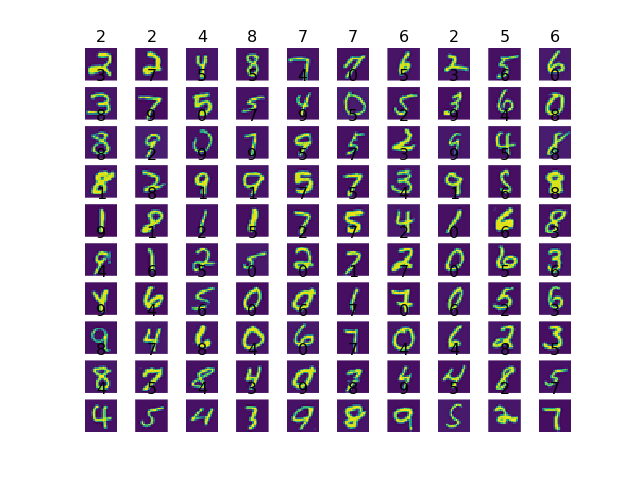

In [42]:
visualize_subset_100(X, y)

In [54]:
input_layer_size, hidden_layer_size, num_labels

(400, 25, 10)

In [59]:
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lam)


In [57]:
nn_params[:hidden_layer_size*input_layer_size+1].shape

(10001,)

In [61]:
m

5000

In [130]:
def h(Theta1, Theta2, X):
    m = X.shape[1]
    _X = np.r_[ones((1, m)), X]
    z2 = dot(Theta1, _X)
    hidden_layer = sigmoid(z2)
    _hidden_layer = np.r_[ones((1, hidden_layer.shape[1])), hidden_layer]
    z3 = dot(Theta2, _hidden_layer)
    output_layer = sigmoid(z3)
    return output_layer

In [124]:
Theta2.shape

(10, 26)

In [119]:
_y.shape

(10, 5000)

In [128]:
_y[:,i].shape

(10,)

In [136]:
Theta2.shape
temp = Theta2[0, :]

In [138]:
Theta2[0, :] = Theta2[-1, :]

In [139]:
Theta2[-1, :] = temp

In [140]:
_y = np.zeros((num_labels, y.shape[1]))
for nyi, yi in enumerate(y.T):
    _y[yi, nyi] = 1
_J = 0
for i in range(m):
    _J += (-_y[:,i][:,None] * log(h(Theta1, Theta2, X[:,i][:,None])) - 
            (1 - _y[:,i][:,None]) * log(1 - h(Theta1, Theta2, X[:,i][:,None])))


In [144]:
_J.sum()/50000

0.92047596971817447

In [143]:
y.shape

(1, 5000)

In [108]:
log(h(Theta1, Theta2, X)).shape

(10, 5000)

In [109]:
_y.shape

(10, 5000)

In [6]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [ ]:
# %load ex4.m
%% Machine Learning Online Class - Exercise 4 Neural Network Learning

%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoidGradient.m
%     randInitializeWeights.m
%     nnCostFunction.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex4data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================ Part 2: Loading Parameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];

%% ================ Part 3: Compute Cost (Feedforward) ================
%  To the neural network, you should first start by implementing the
%  feedforward part of the neural network that returns the cost only. You
%  should complete the code in nnCostFunction.m to return cost. After
%  implementing the feedforward to compute the cost, you can verify that
%  your implementation is correct by verifying that you get the same cost
%  as us for the fixed debugging parameters.
%
%  We suggest implementing the feedforward cost *without* regularization
%  first so that it will be easier for you to debug. Later, in part 4, you
%  will get to implement the regularized cost.
%
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% =============== Part 4: Implement Regularization ===============
%  Once your cost function implementation is correct, you should now
%  continue to implement the regularization with the cost.
%

fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================ Part 5: Sigmoid Gradient  ================
%  Before you start implementing the neural network, you will first
%  implement the gradient for the sigmoid function. You should complete the
%  code in the sigmoidGradient.m file.
%

fprintf('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================ Part 6: Initializing Pameters ================
%  In this part of the exercise, you will be starting to implment a two
%  layer neural network that classifies digits. You will start by
%  implementing a function to initialize the weights of the neural network
%  (randInitializeWeights.m)

fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


%% =============== Part 7: Implement Backpropagation ===============
%  Once your cost matches up with ours, you should proceed to implement the
%  backpropagation algorithm for the neural network. You should add to the
%  code you've written in nnCostFunction.m to return the partial
%  derivatives of the parameters.
%
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;


%% =============== Part 8: Implement Regularization ===============
%  Once your backpropagation implementation is correct, you should now
%  continue to implement the regularization with the cost and gradient.
%

fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);

fprintf('Program paused. Press enter to continue.\n');
pause;


%% =================== Part 8: Training NN ===================
%  You have now implemented all the code necessary to train a neural 
%  network. To train your neural network, we will now use "fmincg", which
%  is a function which works similarly to "fminunc". Recall that these
%  advanced optimizers are able to train our cost functions efficiently as
%  long as we provide them with the gradient computations.
%
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ================= Part 9: Visualize Weights =================
%  You can now "visualize" what the neural network is learning by 
%  displaying the hidden units to see what features they are capturing in 
%  the data.

fprintf('\nVisualizing Neural Network... \n')

displayData(Theta1(:, 2:end));

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% ================= Part 10: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);




In [7]:
PDF('ex4.pdf',size=(900,500))